# 5/29/24 Class Notes #

# Some Additional Machine Learning Ideas #

**Idea:** We now know most of the major classifiers (namely?).  We will just talk about ways that you can extend these ideas (e.g., to images):

0. Creating categorical data from continuous data
1. Algorithmic Regression algorithms
2. Hyperparameter tuning
4. Normalizing data (primarily for nearest neighbord (and logistic, naive Bayes)
5. Ensemble methods

# Creating Categorical Data #

You can do this with numpy or pandas

In [5]:
import pandas as pd
bodydata = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/STAT223-S24/main/Data/bodydata.csv")
bodydata.head(5)

,AGE,GENDER,PULSE,SYSTOLIC,DIASTOLIC,HDL,LDL,WHITE,RED,PLATE,WEIGHT,HEIGHT,WAIST,ARM CIRC,BMI
0,43,0,80,100,70,73,68,8.7,4.80,319,98.6,172.0,120.4,40.7,33.3
1,57,1,84,112,70,35,116,4.9,4.73,187,96.9,186.0,107.8,37.0,28.0
2,38,0,94,134,94,36,223,6.9,4.47,297,108.2,154.4,120.3,44.3,45.4
3,80,1,74,126,64,37,83,7.5,4.32,170,73.1,160.5,97.2,30.3,28.4
4,34,1,50,114,68,50,104,6.1,4.95,140,83.1,179.0,95.1,34.0,25.9


In [31]:
bodydata['BMI'].describe()

count    300.000000
mean      28.912333
std        6.746703
min       15.900000
25%       24.500000
50%       28.000000
75%       31.975000
max       59.000000
Name: BMI, dtype: float64

In [32]:
bodydata['obese'] = pd.cut(bodydata['BMI'], bins=[0,30,100], labels=[0,1])

In [33]:
bodydata.head(5)

,AGE,GENDER,PULSE,SYSTOLIC,DIASTOLIC,HDL,LDL,WHITE,RED,PLATE,WEIGHT,HEIGHT,WAIST,ARM CIRC,BMI,obese
0,43,0,80,100,70,73,68,8.7,4.80,319,98.6,172.0,120.4,40.7,33.3,1
1,57,1,84,112,70,35,116,4.9,4.73,187,96.9,186.0,107.8,37.0,28.0,0
2,38,0,94,134,94,36,223,6.9,4.47,297,108.2,154.4,120.3,44.3,45.4,1
3,80,1,74,126,64,37,83,7.5,4.32,170,73.1,160.5,97.2,30.3,28.4,0
4,34,1,50,114,68,50,104,6.1,4.95,140,83.1,179.0,95.1,34.0,25.9,0


In [34]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [35]:
train_X, test_X, train_y, test_y = train_test_split(bodydata[['GENDER','WAIST']], np.ravel(bodydata[['obese']]), test_size=0.25)

In [36]:
neigh.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [37]:
predicted = neigh.predict(test_X)

In [38]:
confusion_matrix(predicted, test_y)

array([[42,  3],
       [ 7, 23]])

# Algorithmic Regression #

k-NN also yields a [regression algorithm](https://scikit-learn.org/stable/modules/neighbors.html#regression) in which "the label assigned to a query point is computed based on the mean of the labels of its nearest neighbors".  The SKLearn command is [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). 

There is also [decision tree regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) using [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) in which you (1) divide each interval obtained in each variable and then (2) choose your decision to minimize the SSE--that is, the squared difference between the average of the values in the subinterval and the actual values.


In [14]:
import pandas as pd
mydata = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/STAT223-S24/main/Data/bodydata.csv")


In [15]:
mydata.head(5)

,AGE,GENDER,PULSE,SYSTOLIC,DIASTOLIC,HDL,LDL,WHITE,RED,PLATE,WEIGHT,HEIGHT,WAIST,ARM CIRC,BMI
0,43,0,80,100,70,73,68,8.7,4.80,319,98.6,172.0,120.4,40.7,33.3
1,57,1,84,112,70,35,116,4.9,4.73,187,96.9,186.0,107.8,37.0,28.0
2,38,0,94,134,94,36,223,6.9,4.47,297,108.2,154.4,120.3,44.3,45.4
3,80,1,74,126,64,37,83,7.5,4.32,170,73.1,160.5,97.2,30.3,28.4
4,34,1,50,114,68,50,104,6.1,4.95,140,83.1,179.0,95.1,34.0,25.9


In [18]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
myregress = KNeighborsRegressor(n_neighbors = 3)

In [21]:
train_X, test_X, train_y, test_y = train_test_split(mydata[['WEIGHT','HEIGHT']], mydata['WAIST'], test_size=0.3)

In [22]:
myregress.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=3)

In [24]:
mypredict = myregress.predict(test_X)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(mypredict, test_y)

54.73248148148146

In [32]:
myregress2 = KNeighborsRegressor(n_neighbors = 5)
myregress2.fit(train_X, train_y)
mypredict2 =  myregress2.predict(test_X)

In [33]:
mean_squared_error(mypredict2, test_y)

52.9986088888889

# Hyperparameter Tuning ##

Models are build from *parameters* and *hyperparameters*.  The model finds the *parameters* using some sort of algorithm.  You get the **choose** the *hyperparameters*.  You can do this by hand (see, e.g., the homework) or you can do this using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

In [13]:
from sklearn.model_selection import GridSearchCV

### Example ###

In [2]:
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data
y = iris.target

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

#print(grid.grid_scores_)
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13)


### Example 2: (This won't work--missing data, etc) ###

In [62]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [63]:
grid_search = GridSearchCV(estimator=mydt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [65]:
grid_search.fit(train_X, train_y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [66]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007603,0.000353,0.005333,0.000149,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.904762,0.887097,0.919355,0.870968,0.895545,0.018216,9
1,0.006712,0.000786,0.004670,0.000653,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.904762,0.887097,0.919355,0.870968,0.895545,0.018216,9
2,0.008071,0.001245,0.004973,0.000710,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.904762,0.887097,0.919355,0.870968,0.895545,0.018216,9
3,0.008057,0.001061,0.004890,0.000510,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.841270,0.870968,0.903226,0.838710,0.863543,0.026185,31
4,0.006089,0.000454,0.004777,0.000293,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.428571,0.451613,0.451613,0.435484,0.441820,0.010093,41


#  Normalizing Data #

Quantitative data needs to be normalized for some algorithms to work.  We mentioned two ways to do this: (1) the standard scale and the (2) max/min scale. **Question:** Which to use?  Watch for outliers . . .  

You can do this by hand or you can do it with SKLearn, using [MaxMinScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

(array([13., 46., 85., 69., 53., 18.,  8.,  7.,  0.,  1.]),
 array([ 64.4 ,  75.01,  85.62,  96.23, 106.84, 117.45, 128.06, 138.67,
        149.28, 159.89, 170.5 ]),
 <BarContainer object of 10 artists>)

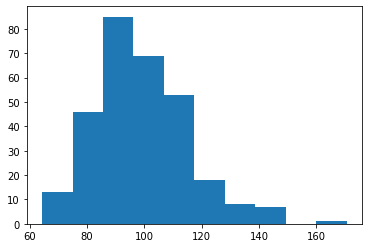

In [85]:
plt.hist(bodydata.WAIST)

## Use the Min/Max Scale ##

In [92]:
bodydata['normwaist2'] = (bodydata['WAIST'].max() - bodydata['WAIST'])/(bodydata['WAIST'].max() - bodydata['WAIST'].min())

In [93]:
bodydata.head(5)

,AGE,GENDER,PULSE,SYSTOLIC,DIASTOLIC,HDL,LDL,WHITE,RED,PLATE,WEIGHT,HEIGHT,WAIST,ARM CIRC,BMI,obese,normwaist,normwaist2
0,43,0,80,100,70,73,68,8.7,4.80,319,98.6,172.0,120.4,40.7,33.3,1,1.287931,0.472196
1,57,1,84,112,70,35,116,4.9,4.73,187,96.9,186.0,107.8,37.0,28.0,0,0.523244,0.590952
2,38,0,94,134,94,36,223,6.9,4.47,297,108.2,154.4,120.3,44.3,45.4,1,1.281862,0.473139
3,80,1,74,126,64,37,83,7.5,4.32,170,73.1,160.5,97.2,30.3,28.4,0,-0.120064,0.690858
4,34,1,50,114,68,50,104,6.1,4.95,140,83.1,179.0,95.1,34.0,25.9,0,-0.247512,0.710650


(array([ 1.,  0.,  7.,  8., 18., 53., 69., 85., 46., 13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

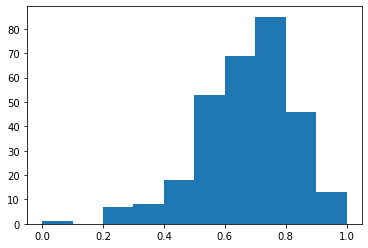

In [94]:
plt.hist(bodydata.normwaist2)

**Question:** When in the process to do this?

In [13]:
from sklearn.preprocessing import MinMaxScaler

## Use the Standard Scale ##

In [86]:
bodydata['normwaist'] = (bodydata['WAIST'] - bodydata['WAIST'].mean())/bodydata['WAIST'].std()

In [87]:
bodydata.head(5)

,AGE,GENDER,PULSE,SYSTOLIC,DIASTOLIC,HDL,LDL,WHITE,RED,PLATE,WEIGHT,HEIGHT,WAIST,ARM CIRC,BMI,obese,normwaist
0,43,0,80,100,70,73,68,8.7,4.80,319,98.6,172.0,120.4,40.7,33.3,1,1.287931
1,57,1,84,112,70,35,116,4.9,4.73,187,96.9,186.0,107.8,37.0,28.0,0,0.523244
2,38,0,94,134,94,36,223,6.9,4.47,297,108.2,154.4,120.3,44.3,45.4,1,1.281862
3,80,1,74,126,64,37,83,7.5,4.32,170,73.1,160.5,97.2,30.3,28.4,0,-0.120064
4,34,1,50,114,68,50,104,6.1,4.95,140,83.1,179.0,95.1,34.0,25.9,0,-0.247512


## StandardScaler ##

In [6]:
from sklearn.preprocessing import StandardScaler

In [9]:
mystscaler = StandardScaler()

In [7]:
mydata.head(5)

,AGE,GENDER,PULSE,SYSTOLIC,DIASTOLIC,HDL,LDL,WHITE,RED,PLATE,WEIGHT,HEIGHT,WAIST,ARM CIRC,BMI
0,43,0,80,100,70,73,68,8.7,4.80,319,98.6,172.0,120.4,40.7,33.3
1,57,1,84,112,70,35,116,4.9,4.73,187,96.9,186.0,107.8,37.0,28.0
2,38,0,94,134,94,36,223,6.9,4.47,297,108.2,154.4,120.3,44.3,45.4
3,80,1,74,126,64,37,83,7.5,4.32,170,73.1,160.5,97.2,30.3,28.4
4,34,1,50,114,68,50,104,6.1,4.95,140,83.1,179.0,95.1,34.0,25.9


In [8]:
myxvars = mydata[['WEIGHT','HEIGHT','WAIST']]

In [35]:
mynewX = mystscaler.fit_transform(myxvars)